# Pattern Recognition
## Ehsan Kouchaki
### Dec. 10, 2021
####

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel('Data.xlsx')
df

,,ω1,Unnamed: 2,ω2,Unnamed: 4,ω3,Unnamed: 6,ω4,Unnamed: 8
0,Sample,x1,x2,x1,x2,x1,x2,x1,x2
1,1,0.1,1.1,7.1,4.2,-3,-2.9,-2,-8.4
2,2,6.8,7.1,-1.4,-4.3,0.5,8.7,-8.9,0.2
3,3,-3.5,-4.1,4.5,0,2.9,2.1,-4.2,-7.7
4,4,2,2.7,6.3,1.6,-0.1,5.2,-8.5,-3.2
5,5,4.1,2.8,4.2,1.9,-4,2.2,-6.7,-4
6,6,3.1,5,1.4,-3.2,-1.3,3.7,-0.5,-9.2
7,7,-0.8,-1.3,2.4,-4,-3.4,6.2,-5.3,-6.7
8,8,0.9,1.2,2.5,-6.1,-4.1,3.4,-8.7,-6.4
9,9,5,6.4,8.4,3.7,-5.1,1.6,-7.1,-9.7


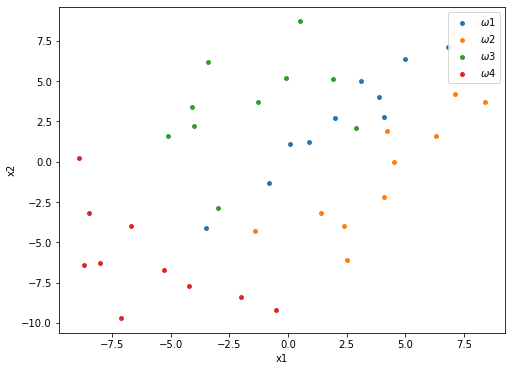

In [3]:
omega1 = df.iloc[1:, 1:3].to_numpy(dtype=float)
omega2 = df.iloc[1:, 3:5].to_numpy(dtype=float)
omega3 = df.iloc[1:, 5:7].to_numpy(dtype=float)
omega4 = df.iloc[1:, 7:9].to_numpy(dtype=float)

plt.figure(figsize=(8, 6))
plt.scatter(omega1[:, 0], omega1[:, 1], s = 15)
plt.scatter(omega2[:, 0], omega2[:, 1], s = 15)
plt.scatter(omega3[:, 0], omega3[:, 1], s = 15)
plt.scatter(omega4[:, 0], omega4[:, 1], s = 15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['$\omega1$', '$\omega2$', '$\omega3$', '$\omega4$'])

### Problem1: Perceptron (Pattern mode)

The results of omega1 and omega2: 

The weight vector of the classifier is: 
 [-10.6  12.6  20. ]

The number of itteration is:  12


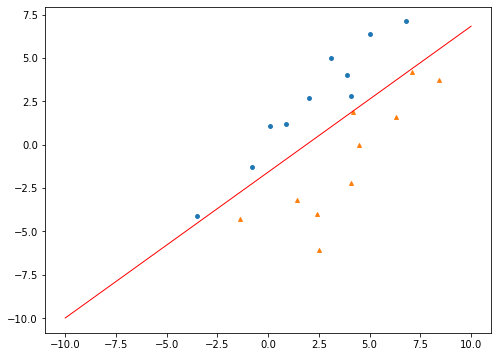

The results of omega3 and omega2: 

The weight vector of the classifier is: 
 [-5.5  6.8  7. ]

The number of itteration is:  5


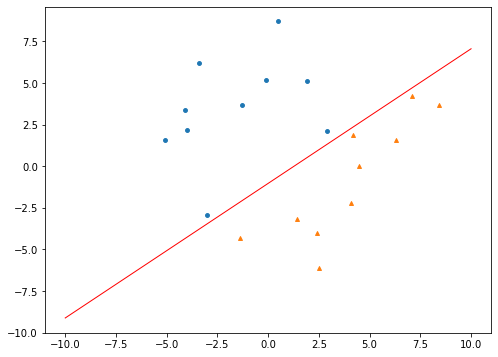

In [4]:
for problem_num in range(2):
    if (problem_num == 0):
        samp1 = np.concatenate((omega1, np.ones((10, 1)), np.zeros((10, 1))), 1)
        samp2 = np.concatenate((omega2, np.ones((10, 1)), np.ones((10, 1))), 1)
    else:
        samp1 = np.concatenate((omega3, np.ones((10, 1)), np.zeros((10, 1))), 1)
        samp2 = np.concatenate((omega2, np.ones((10, 1)), np.ones((10, 1))), 1)
    
    all_samp = np.concatenate((samp1, samp2), 0)
    np.random.shuffle(all_samp)

    w = np.array([0.0, 0.0, 0.0])
    
    ro = 1
    no_action = 0
    itr_num = 0
    while (no_action <= len(all_samp)):
        for i in range(len(all_samp)):
            x_t = all_samp[i, 0:3]
            if (all_samp[i,3] == 0 and w@x_t <= 0):
                w += ro*x_t
                no_action = 0
            elif (all_samp[i,3] == 1 and w@x_t >= 0):
                w -= ro*x_t
                no_action = 0
            else:
                no_action += 1
        itr_num += 1

    if (problem_num == 0):
        print("The results of omega1 and omega2: \n")
    else:
        print("The results of omega3 and omega2: \n")
    
    print("The weight vector of the classifier is: \n", w)
    print("\nThe number of itteration is: ", itr_num)
    
    x = np.linspace(-10,10,100)
    plt.figure(figsize= (8,6))
    plt.plot(x, -w[0]/w[1]*x - w[2]/w[1], color = 'r', linewidth=1)
    plt.scatter(samp1[:, 0], samp1[:, 1], s=15)
    plt.scatter(samp2[:, 0], samp2[:, 1], s=15, marker = '^')
    plt.show()


### Problem1: Perceptron (Batch mode)

The results of omega1 and omega2: 

The weight vector of the classifier is: 
 [-30.4  34.1  34. ]

The number of itteration is:  24


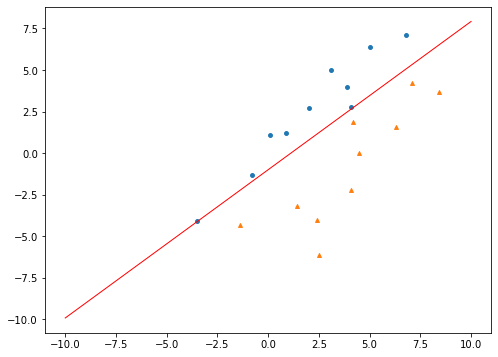

The results of omega3 and omega2: 

The weight vector of the classifier is: 
 [-41.4  48.6  19. ]

The number of itteration is:  17


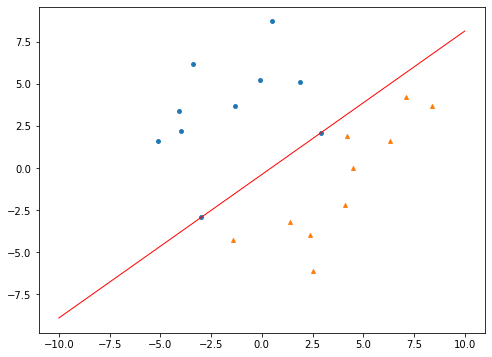

In [5]:
for problem_num in range(2):
    if(problem_num == 0):
        samp1 = np.concatenate((omega1, np.ones((10, 1)), -np.ones((10, 1))), 1)
        samp2 = np.concatenate((omega2, np.ones((10, 1)), +np.ones((10, 1))), 1)
    else:
        samp1 = np.concatenate((omega3, np.ones((10, 1)), -np.ones((10, 1))), 1)
        samp2 = np.concatenate((omega2, np.ones((10, 1)), +np.ones((10, 1))), 1)
        
    all_samp = np.concatenate((samp1, samp2), 0)

    w = np.array([0.0, 0.0, 0.0])
    ro = 1

    itr_num = 0
    while(True):
        itr_num += 1
        Y = []
        for i in range(len(all_samp)):
            x_t = all_samp[i, 0:3]
            delta = all_samp[i, 3]
            if (delta*w@x_t >= 0): Y.append(delta * x_t)

        if (len(Y) != 0): w -= ro * sum(Y)
        else: break

    if (problem_num == 0):
        print("The results of omega1 and omega2: \n")        
    else:
        print("The results of omega3 and omega2: \n")
    
    print("The weight vector of the classifier is: \n", w)
    print("\nThe number of itteration is: ", itr_num)
    
    x = np.linspace(-10,10,100)
    plt.figure(figsize= (8,6))
    plt.plot(x, -w[0]/w[1]*x - w[2]/w[1], color = 'r', linewidth=1)
    plt.scatter(samp1[:, 0], samp1[:, 1], s=15)
    plt.scatter(samp2[:, 0], samp2[:, 1], s=15, marker = '^')
    plt.show()        
      

### Problem2: Least Squer

The results of omega1 and omega2: 

The weight vector of the classifier is: 
 [-0.33391921600076024, 0.28785693487557085, 0.7826412336099765]


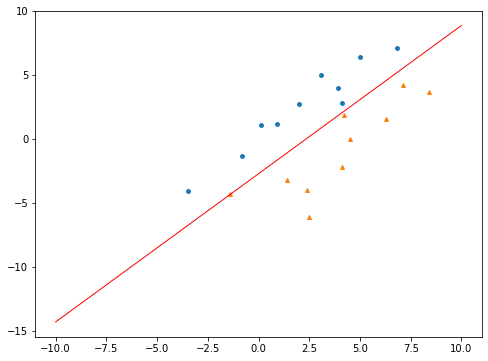

The results of omega3 and omega2: 

The weight vector of the classifier is: 
 [-0.17987721564209358, 0.1370134344828003, 0.029770817234725036]


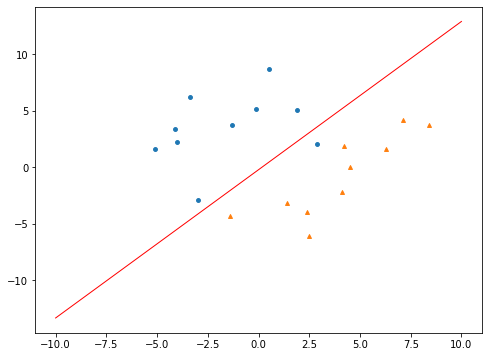

In [7]:
for problem_num in range(2):
    if(problem_num == 0):
        X1 = np.concatenate((omega1, np.ones((10, 1))), 1)
        X2 = np.concatenate((omega2, np.ones((10, 1))), 1)
    else:
        X1 = np.concatenate((omega3, np.ones((10, 1))), 1)
        X2 = np.concatenate((omega2, np.ones((10, 1))), 1)
        
    X = np.concatenate((X1, X2), 0)
    y = np.concatenate((np.ones((10, 1)), -np.ones((10, 1))), 0)
    
    X_sudo_inv = np.linalg.inv(X.T@X)@(X.T)
    w = X_sudo_inv@y
    
    if (problem_num == 0):
        print("The results of omega1 and omega2: \n")        
    else:
        print("The results of omega3 and omega2: \n")
    print("The weight vector of the classifier is: \n", [w[0][0], w[1][0], w[2][0]])
    x = np.linspace(-10,10,100)
    
    plt.figure(figsize= (8,6))
    plt.plot(x, -w[0][0]/w[1][0]*x - w[2][0]/w[1][0], color = 'r', linewidth=1)
    plt.scatter(X1[:, 0], X1[:, 1], s=15)
    plt.scatter(X2[:, 0], X2[:, 1], s=15, marker = '^')
    plt.show()        
    

### Problem3: Logistic Discrimination (a)

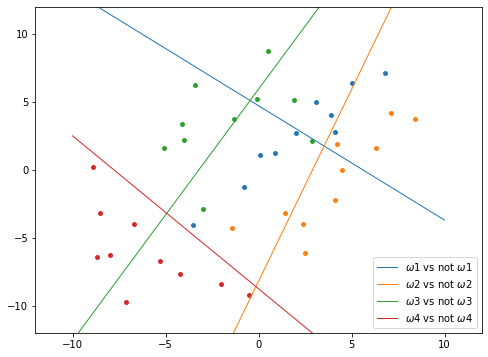

In [8]:
plt.figure(figsize=(8, 6))
plt.xlim([-12, 12])
plt.ylim([-12, 12])

for prob_num in range(4):
    if (prob_num == 0):
        class1 = omega1
        class2 = np.concatenate((omega2, omega3, omega4))
    elif (prob_num == 1):
        class1 = omega2
        class2 = np.concatenate((omega1, omega3, omega4))
    elif (prob_num == 2):
        class1 = omega3
        class2 = np.concatenate((omega1, omega2, omega4))
    elif (prob_num == 3):
        class1 = omega4
        class2 = np.concatenate((omega1, omega2, omega3))    

    class1 = np.concatenate((class1, np.ones((10, 1))), 1)
    class2 = np.concatenate((class2, np.zeros((30, 1))), 1)
    all_samp = np.concatenate((class1, class2))

    wj = np.random.uniform(low=-0.01, high=0.01, size=(3))
    etta = 0.1
    
    for _ in range(5000):
        delta_wj = np.zeros(3)
        for i in range(40):
            xi = np.concatenate((all_samp[i, :2], [1]))
            yi = all_samp[i, 2]
            o = wj@xi
            z = 1/(1 + np.exp(-o))
            delta_wj += (yi - z) * xi
        wj += etta * delta_wj   

    x = np.linspace(-10,10,100)
    if (prob_num == 0):
        plt.plot(x, -wj[0]/wj[1]*x - wj[2]/wj[1], color = '#1f77b4', linewidth=1)
    elif (prob_num == 1):
        plt.plot(x, -wj[0]/wj[1]*x - wj[2]/wj[1], color = '#ff7f0e', linewidth=1)
    elif (prob_num == 2):
        plt.plot(x, -wj[0]/wj[1]*x - wj[2]/wj[1], color = '#2ca02c', linewidth=1)
    elif (prob_num == 3):
        plt.plot(x, -wj[0]/wj[1]*x - wj[2]/wj[1], color = '#d62728', linewidth=1)
    
plt.scatter(omega1[:, 0], omega1[:, 1], s = 15)
plt.scatter(omega2[:, 0], omega2[:, 1], s = 15)
plt.scatter(omega3[:, 0], omega3[:, 1], s = 15)
plt.scatter(omega4[:, 0], omega4[:, 1], s = 15)
plt.legend(['$\omega1$ vs not $\omega1$', '$\omega2$ vs not $\omega2$',
            '$\omega3$ vs not $\omega3$', '$\omega4$ vs not $\omega4$'])    

### Problem3: Logistic Discrimination (b)

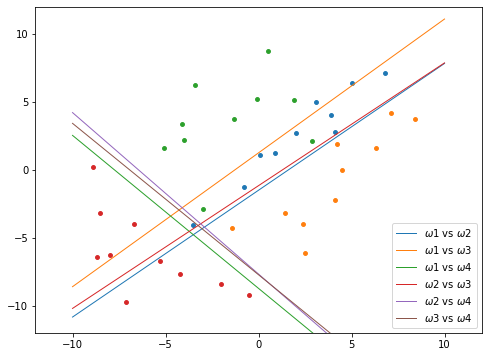

In [9]:
plt.figure(figsize=(8, 6))
plt.xlim([-12, 12])
plt.ylim([-12, 12])

for prob_num in range(6):
    if (prob_num == 0):
        class1 = omega1
        class2 = omega2
    elif (prob_num == 1):
        class1 = omega1
        class2 = omega3
    elif (prob_num == 2):
        class1 = omega1
        class2 = omega4
    elif (prob_num == 3):
        class1 = omega2
        class2 = omega3
    elif (prob_num == 4):
        class1 = omega2
        class2 = omega4
    elif (prob_num == 5):
        class1 = omega3
        class2 = omega4 

    class1 = np.concatenate((class1, np.ones((10, 1))), 1)
    class2 = np.concatenate((class2, np.zeros((10, 1))), 1)
    all_samp = np.concatenate((class1, class2))

    wj = np.random.uniform(low=-0.01, high=0.01, size=(3))
    etta = 0.08
    
    for _ in range(5000):
        delta_wj = np.zeros(3)
        for i in range(20):
            xi = np.concatenate((all_samp[i, :2], [1]))
            yi = all_samp[i, 2]
            o = wj@xi
            z = 1/(1 + np.exp(-o))
            delta_wj += (yi - z) * xi
        wj += etta * delta_wj   

    x = np.linspace(-10,10,100)
    if (prob_num == 0):
        plt.plot(x, -wj[0]/wj[1]*x - wj[2]/wj[1], color = '#1f77b4', linewidth=1)
    elif (prob_num == 1):
        plt.plot(x, -wj[0]/wj[1]*x - wj[2]/wj[1], color = '#ff7f0e', linewidth=1)
    elif (prob_num == 2):
        plt.plot(x, -wj[0]/wj[1]*x - wj[2]/wj[1], color = '#2ca02c', linewidth=1)
    elif (prob_num == 3):
        plt.plot(x, -wj[0]/wj[1]*x - wj[2]/wj[1], color = '#d62728', linewidth=1)
    elif (prob_num == 4):
        plt.plot(x, -wj[0]/wj[1]*x - wj[2]/wj[1], color = '#9467bd', linewidth=1)
    elif (prob_num == 5):
        plt.plot(x, -wj[0]/wj[1]*x - wj[2]/wj[1], color = '#8c564b', linewidth=1)
    
plt.scatter(omega1[:, 0], omega1[:, 1], s = 15)
plt.scatter(omega2[:, 0], omega2[:, 1], s = 15)
plt.scatter(omega3[:, 0], omega3[:, 1], s = 15)
plt.scatter(omega4[:, 0], omega4[:, 1], s = 15)
plt.legend(['$\omega1$ vs $\omega2$', '$\omega1$ vs $\omega3$',
            '$\omega1$ vs $\omega4$', '$\omega2$ vs $\omega3$',
            '$\omega2$ vs $\omega4$', '$\omega3$ vs $\omega4$'])    